<a href="https://colab.research.google.com/github/Highflying07/Data-Science/blob/main/%ED%86%B5%EA%B3%842.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import stats
import numpy as np

# 주어진 값
sample_mean = 495
mu = 500
std = 10
n = 25
alpha = 0.05

# t-통계량 계산
t_statistic = (sample_mean - mu) / (std / np.sqrt(n))

# 자유도
df = n - 1

# p-value 계산 (양측 검정 → 양쪽 tail)
p_value = stats.t.sf(np.abs(t_statistic), df=df) * 2

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


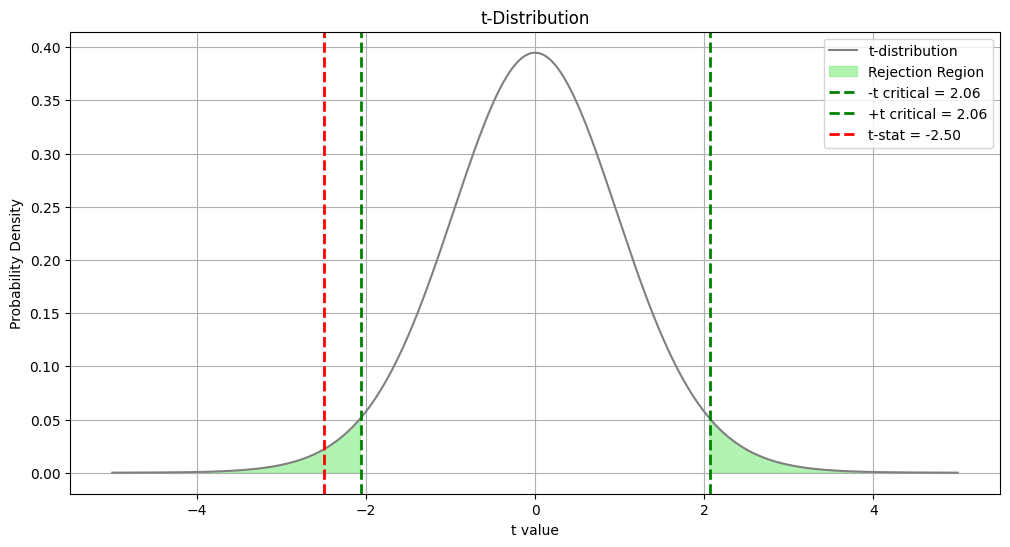

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 설정값
sample_mean = 495
mu = 500
std = 10
n = 25
alpha = 0.05
df = n - 1

# t-통계량 계산
t_stat = (sample_mean - mu) / (std / np.sqrt(n))

# 임계값 계산 (양측 검정 → 양쪽 끝의 임계값)
t_critical = stats.t.ppf(1 - alpha/2, df)

# x축 범위 설정 (t분포 기준)
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

# 그래프
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='t-distribution', color='gray')

# 기각역 채우기 (양쪽 꼬리, 초록색)
plt.fill_between(x, y, where=(x <= -t_critical) | (x >= t_critical), color='lightgreen', alpha=0.7, label='Rejection Region')

# 임계값 (기각 경계선, 초록색 점선)
plt.axvline(-t_critical, color='green', linestyle='dashed', linewidth=2, label=f'-t critical = {t_critical:.2f}')
plt.axvline(t_critical, color='green', linestyle='dashed', linewidth=2, label=f'+t critical = {t_critical:.2f}')

# 실제 t-통계량 표시 (빨간 점선)
plt.axvline(t_stat, color='red', linestyle='dashed', linewidth=2, label=f't-stat = {t_stat:.2f}')

# 그래프 제목 및 범례
plt.title('t-Distribution')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy import stats

# 1. 데이터 정의
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]

# 2. 모집단 평균
mu = 75

# 3. 유의수준
alpha = 0.05

# 4. t-검정 수행 (단일 표본 t-test)
t_stat, p_value = stats.ttest_1samp(sample_scores, popmean=mu)

# 5. 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다.")


t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


In [ ]:
from scipy import stats

# 1. 데이터 정의
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

alpha = 0.05  # 유의수준

# 2. 등분산 검정 (Levene's test)
levene_stat, levene_p = stats.levene(group_A, group_B)

equal_var = levene_p > alpha  # 등분산 여부 판단

# 3. 독립 표본 t-검정
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=equal_var)

#3.5 T 임계치
from scipy.stats import t
t_critical = t.ppf(0.975, df=8)
print(f"T임계치: {t_critical: .4f}")

# 4. 결과 출력
print(f"등분산 검정 p-value: {levene_p:.4f}  equal_var = {equal_var}")
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다.")


T임계치:  2.3060
등분산 검정 p-value: 0.2703  equal_var = True
t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


In [5]:
import kagglehub
import os
import pandas as pd
import numpy as np

# 1. 데이터 다운로드
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
file_path = os.path.join(path, os.listdir(path)[0])
retail = pd.read_csv(file_path)
retail.head()
retail.describe()


# 2. TotalPrice 컬럼 추가
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

# 3. 영국 데이터 필터링
uk_data = retail[retail['Country'] == 'United Kingdom'].copy()

# 4. 모집단 평균 계산
population_mean = uk_data['TotalPrice'].mean()
print(f"모집단 평균 (영국 전체): {population_mean:.2f}")

# 5. 서로 다른 표본 크기로 표본 평균 비교
sample_sizes = [30, 100, 300]

for size in sample_sizes:
    sample = uk_data['TotalPrice'].sample(n=size, random_state=42)  # random_state로 재현 가능
    sample_mean = sample.mean()
    print(f"Sample size: {size}, Mean TotalPrice: {sample_mean:.2f}")
print('더 많은 샘플을 살펴봐야, 보다 정확한 근거를 이야기 할 수 있다.')

모집단 평균 (영국 전체): 16.69
Sample size: 30, Mean TotalPrice: 11.88
Sample size: 100, Mean TotalPrice: 16.09
Sample size: 300, Mean TotalPrice: 13.34
더 많은 샘플을 살펴봐야, 보다 정확한 근거를 이야기 할 수 있다.


In [7]:
import pandas as pd
import os
import kagglehub
import scipy.stats as stats

# 1. 데이터 불러오기
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
file_path = os.path.join(path, os.listdir(path)[0])
retail = pd.read_csv(file_path)

# 2. TotalPrice 계산 & 영국 데이터 필터링
retail['TotalPrice'] = retail['Quantity'] * retail['Price']
uk_data = retail[retail['Country'] == 'United Kingdom']['TotalPrice']

# 3. 신뢰구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)  # 표준오차
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 4. 표본 크기별 신뢰구간 비교
sample_sizes = [30, 100, 300]

for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: ({interval[0]:.2f}, {interval[1]:.2f})")
print('샘플의 양이 증가할수록 신뢰구간이 좁아지는 것을 확인할 수 있다.')


Sample size: 30, Mean: 11.88, 95% CI: (6.38, 17.38)
Sample size: 100, Mean: 16.09, 95% CI: (11.14, 21.03)
Sample size: 300, Mean: 13.34, 95% CI: (11.26, 15.42)
샘플의 양이 증가할수록 신뢰구간이 좁아지는 것을 확인할 수 있다.


In [ ]:
from scipy import stats
import pandas as pd
import os
import kagglehub

# 1. 데이터 불러오기
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
file_path = os.path.join(path, os.listdir(path)[0])
retail = pd.read_csv(file_path)

# 2. TotalPrice 컬럼 생성
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

# 3. 국가별로 데이터 추출
uk_total = retail[retail['Country'] == 'United Kingdom']['TotalPrice'].dropna()
de_total = retail[retail['Country'] == 'Germany']['TotalPrice'].dropna()

# 4. 독립 표본 t-검정 수행 (등분산 가정)
t_stat, p_value = stats.ttest_ind(uk_total, de_total, equal_var=True)

# 5. 결과 해석
if p_value < 0.05:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}")
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}")
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")


t-값: -3.0762, p-value: 0.0021
영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


In [ ]:
# 페이지 A 전환율: 8.0%
# 페이지 B 전환율: 11.0%

# 차이: +3.0%
# p-value ≈ 0.25

# 해석
# p-value = 0.25  0.05보다 크다!

# H0 귀무가설: 두 페이지의 전환율은 같다
# H1 대립가설: 전환율이 다르다

# 귀무가설을 기각할 수 없다.
# 통계적으로 유의미한 차이는 없다. 바꿀이유가 없다.

In [ ]:
# A/B 테스트는 숫자만이 전부가 아니다.
# 실험 결과가 통계적으로 유의하더라도, 전환율 차이가 3%라면 그걸 적용하는 데 드는 리소스가 과연 맞는가?
# 의사결정은 수치 + 맥락(사업 전략, 사용자 경험, ROI) 을 함께 고려해야 한다
# A/B 테스트 결과가 유의하더라도 실질적인 효과가 작다면, 변경을 보류하거나 다른 실험을 우선시하는 전략적 판단이 필요하다.